In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
df = pd.read_csv('barrier_variance.csv')
print(df.shape)
df.head()

(196, 7)


,dH sigma,dS sigma,effective barrier,permeability,max barrier,max enthalpic barrier,max entropic barrier
0,0.0001,0.0001,6.276844,2.989372e+03,10.631851,4.500428,-0.019559
1,0.0001,0.0010,6.351158,2.638806e+03,12.001108,4.500480,-0.015142
2,0.0001,0.0100,11.085566,9.335950e-01,23.548235,4.500462,0.025636
3,0.0001,0.0500,34.954986,3.715601e-18,82.207880,4.500461,0.202945
4,0.0001,0.1000,58.684703,1.869561e-35,149.246554,4.500461,0.473278


/Users/nate_schwindt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


<AxesSubplot:xlabel='dH sigma', ylabel='dS sigma'>

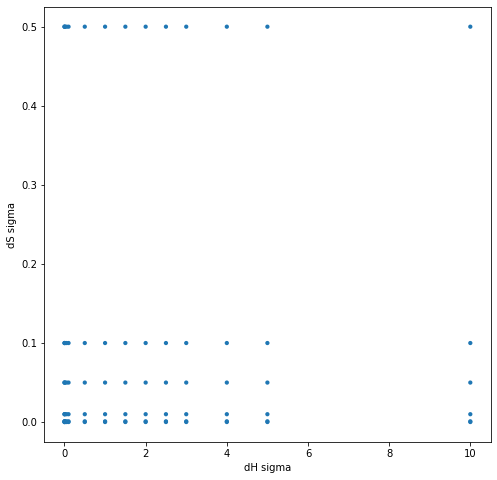

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(data=df, x='dH sigma', y='dS sigma', ax=ax, size='effective barrier')

In [10]:
df1 = pd.read_csv('barrier_variance_ROC.csv')
print(df1.shape)
df1.head()

(235200, 6)


,paths,permeability,permeability percent,dH sigma,dS sigma,model
0,1,2.495985,0.083484,0.0001,0.0001,1.0
1,2,2.490142,0.083289,0.0001,0.0001,1.0
2,3,2.498071,0.083554,0.0001,0.0001,1.0
3,4,2.489327,0.083261,0.0001,0.0001,1.0
4,5,2.486365,0.083162,0.0001,0.0001,1.0


  1%|          | 175/16800 [00:14<22:59, 12.05it/s]


KeyboardInterrupt: 

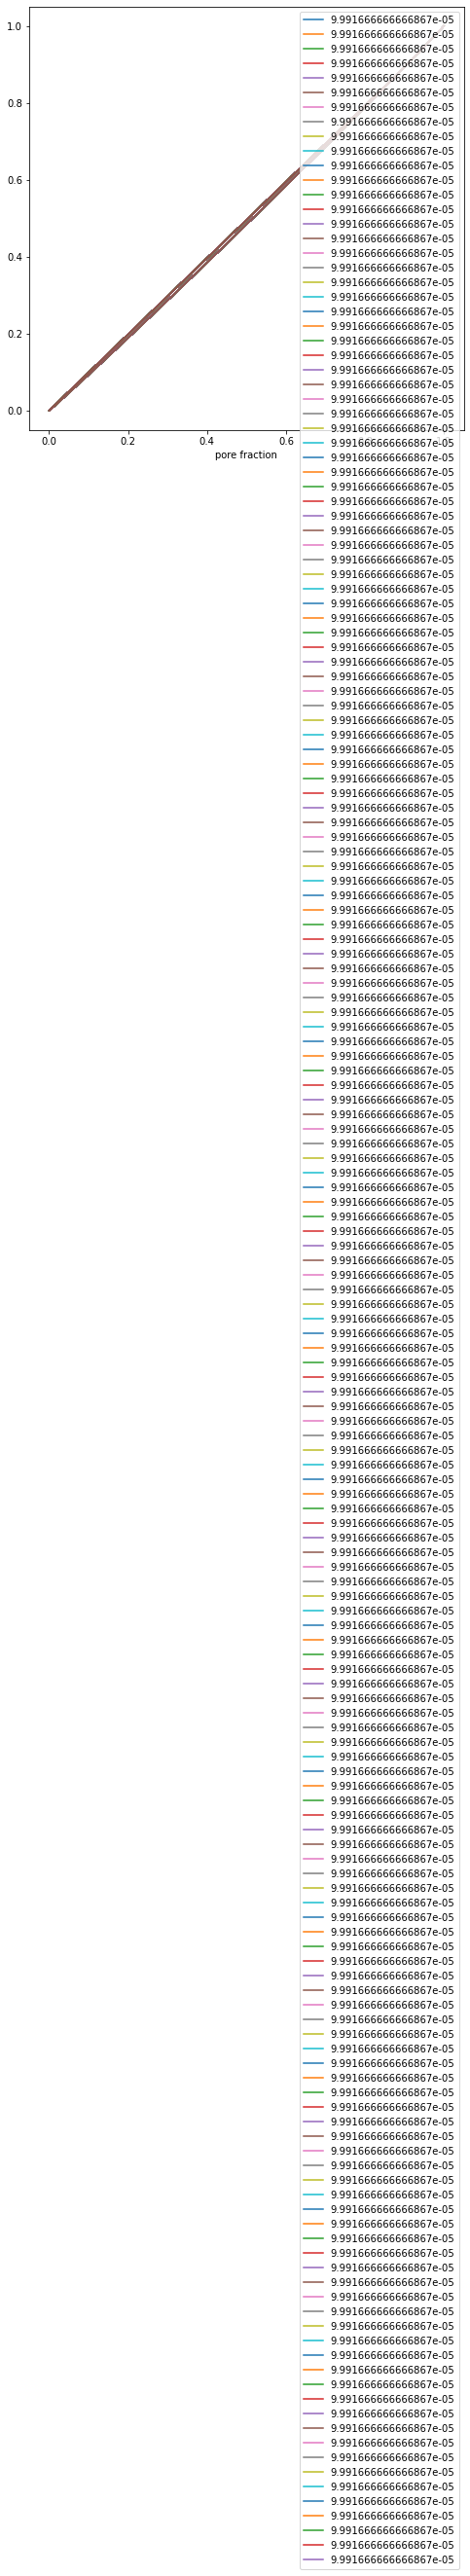

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

df2 = df1[df1['dS sigma'] == 0.001]
for m in tqdm(df2.model):
    df3 = df2[df2.model == m].sort_values('permeability percent', ascending=True)
    n_paths = df3.paths.max()

    df3['flux fraction'] = df3['permeability percent'].cumsum() / 100
    df3['pore fraction'] = np.arange(1,n_paths+1) / n_paths
    df3.loc[len(df3.index)] = [0,0,0,0,0,m,0,0] # add zero row for ROC curve

    df3.plot(x='pore fraction', y='flux fraction', ax=ax, label=df3['dH sigma'].mean())